Explore market data.
=====


In [30]:
import mypo

In [31]:
loader = mypo.Loader()
loader.get('VOO', expense_ratio=0.0003)
loader.get('TLT', expense_ratio=0.0015)

<AxesSubplot:xlabel='Date'>

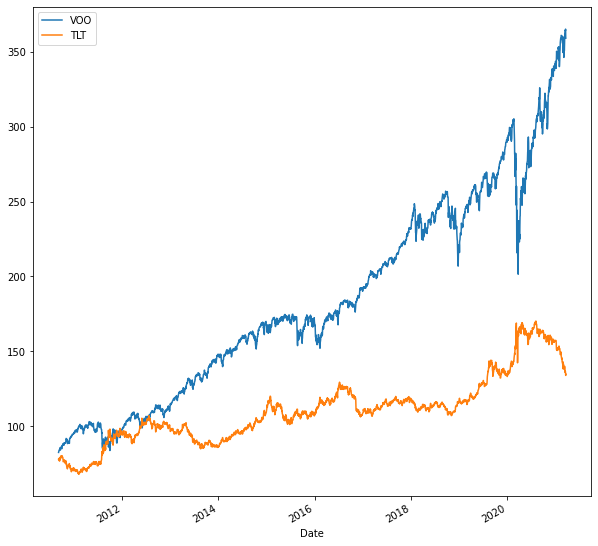

In [32]:
market = loader.get_market()
market.get_raw().plot()

In [33]:
index = market.get_index()
print(index[0])
print(index[-1])

2010-09-09 00:00:00
2021-03-19 00:00:00


<AxesSubplot:xlabel='Date'>

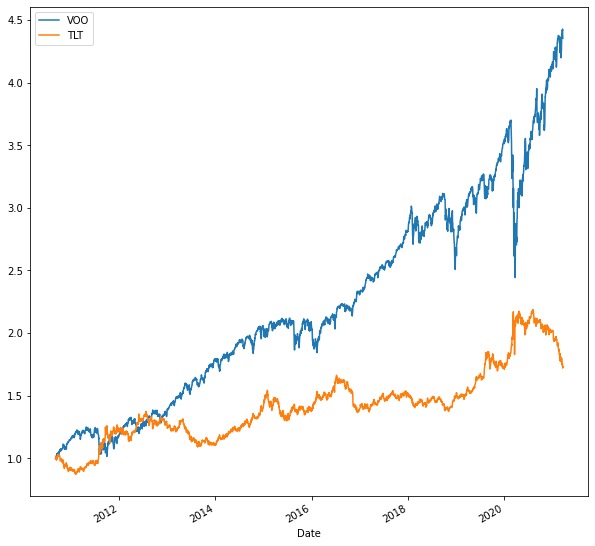

In [34]:
market.get_normalized_prices().plot()


<AxesSubplot:xlabel='Date'>

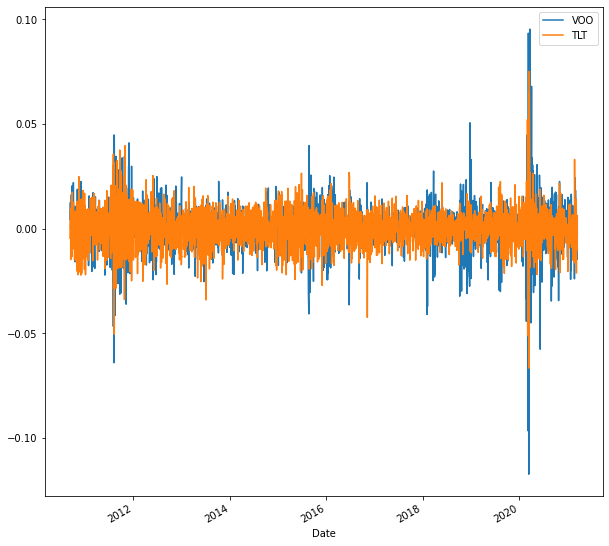

In [35]:
rate_of_change = market.get_rate_of_change()
rate_of_change.plot()


array([[<AxesSubplot:title={'center':'VOO'}>,
        <AxesSubplot:title={'center':'TLT'}>]], dtype=object)

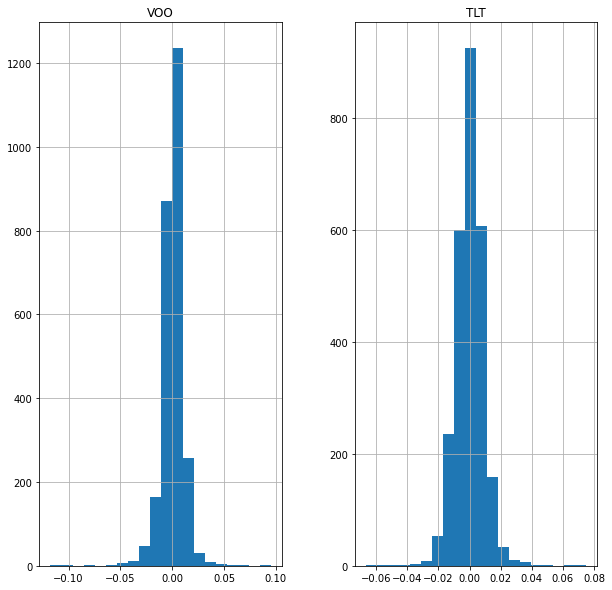

In [36]:
rate_of_change.hist(bins=20)

In [37]:
rate_of_change.describe()

,VOO,TLT
count,2649.000000,2649.000000
mean,0.000615,0.000249
std,0.010850,0.009186
min,-0.117388,-0.066683
25%,-0.003247,-0.005044
50%,0.000754,0.000657
75%,0.005552,0.005604
max,0.095364,0.075196


In [75]:
years = [str(y) for y in sorted(set(rate_of_change.index.year))]
first_complete_year = years[1]
last_complete_year = years[-2]

In [76]:
yearly_summary = rate_of_change[first_complete_year:last_complete_year] + 1.0
yearly_summary.resample("Y").prod() - 1.0

,VOO,TLT
Date,,
2011-12-31,0.018975,0.340011
2012-12-31,0.159928,0.024095
2013-12-31,0.323865,-0.133813
2014-12-31,0.129279,0.273019
2015-12-31,0.013251,-0.017896
2016-12-31,0.121668,0.011716
2017-12-31,0.217736,0.091826
2018-12-31,-0.045007,-0.016119
2019-12-31,0.313650,0.141184


<AxesSubplot:xlabel='VOO', ylabel='TLT'>

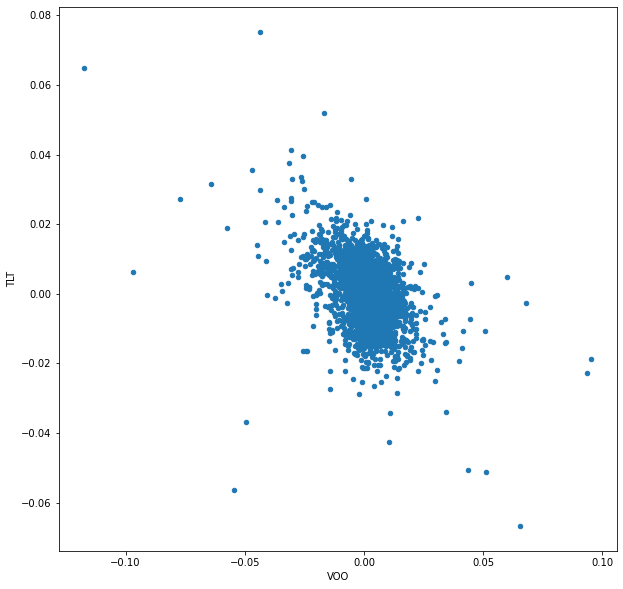

In [38]:
rate_of_change.plot.scatter(
    x = rate_of_change.columns[0],
    y = rate_of_change.columns[1]
)

In [39]:
rate_of_change.corr()




,VOO,TLT
VOO,1.000000,-0.450145
TLT,-0.450145,1.000000
